In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
# 데이터 처리 및 분석
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 출력 설정
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 한글 폰트 설정
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)

# 시드 설정
np.random.seed(42) # 팀원간의 결과물이 동일하게 보일 수 있음

print("="*60)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("="*60)

라이브러리 로드 완료!
한글 폰트 설정 완료!


#### 주문 데이터 처리

In [49]:
import os
os.chdir(r"C:\Users\lizzy\스파르타_파이썬\심화플젝")
print(os.getcwd())  # 잘 바뀌었는지 확인

C:\Users\lizzy\스파르타_파이썬\심화플젝


In [50]:
ord_df = pd.read_csv("olist_orders_dataset.csv")

In [51]:

#date_column_list = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
#ord_df = prep.to_date(ord_df, date_column_list) 


date_column_list = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_column_list:
    ord_df[col] = pd.to_datetime(ord_df[col])

In [52]:
# ord_df['estimated_dt'] = ord_df.apply(
#     lambda row: prep.date_diff(
#         row['order_purchase_timestamp'],
#         row['order_estimated_delivery_date']
#     ),
#     axis=1  # 행 단위 적용 (필수)
# )

# ord_df['real_dt'] = ord_df.apply(
#     lambda row: prep.date_diff(
#         row['order_purchase_timestamp'],
#         row['order_delivered_customer_date']
#     ),
#     axis=1
# )

ord_df['estimated_dt'] = (ord_df['order_estimated_delivery_date'] - ord_df['order_purchase_timestamp']).dt.days
ord_df['real_dt'] = (ord_df['order_delivered_customer_date'] - ord_df['order_purchase_timestamp']).dt.days

In [53]:
def handle_outliers_iqr_num(df):
    # 수치형 컬럼만 선택
    numeric_cols = df.select_dtypes(include='number').columns
    df_out = df.copy()


    for col in numeric_cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이상치를 하한선 또는 상한선으로 대체
        df_out = df_out[(df_out[col] > lower_bound) & (df_out[col] < upper_bound)]

    return df_out

def handle_outliers_iqr_selection(df, columns):
    df_out = df.copy()

    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이상치를 하한선 또는 상한선으로 대체
        df_out = df_out[(df_out[col] > lower_bound) & (df_out[col] < upper_bound)]

    return df_out

In [54]:
ord_df = handle_outliers_iqr_num(ord_df)

In [55]:
ord_df.dropna(inplace=True)

<Axes: >

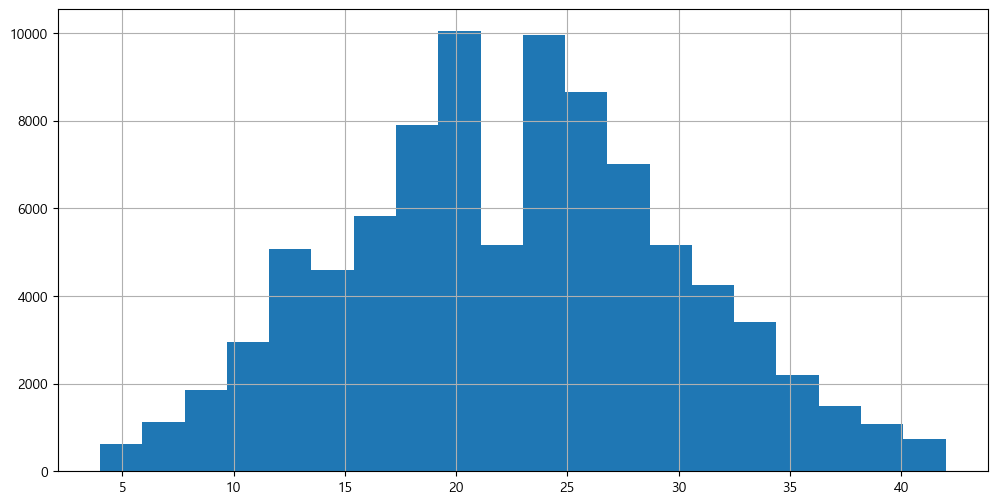

In [56]:
ord_df['estimated_dt'].hist(bins=20)

<Axes: >

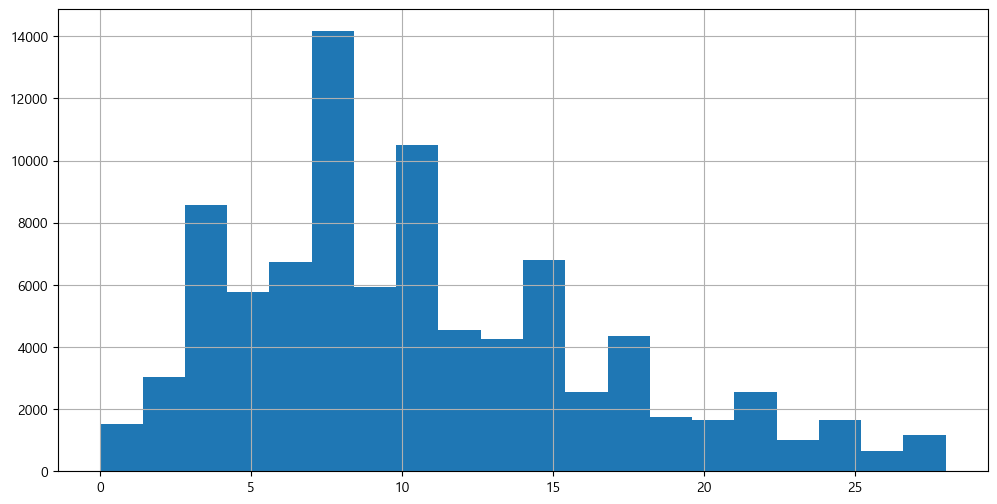

In [57]:
ord_df['real_dt'].hist(bins=20)

ord_df['dd'] = ord_df['estimated_dt'] - ord_df['real_dt']
0보다 크면 배송 미지연
0보다 작으면 배송 지연

In [58]:
ord_df['dd'] = ord_df['estimated_dt'] - ord_df['real_dt']

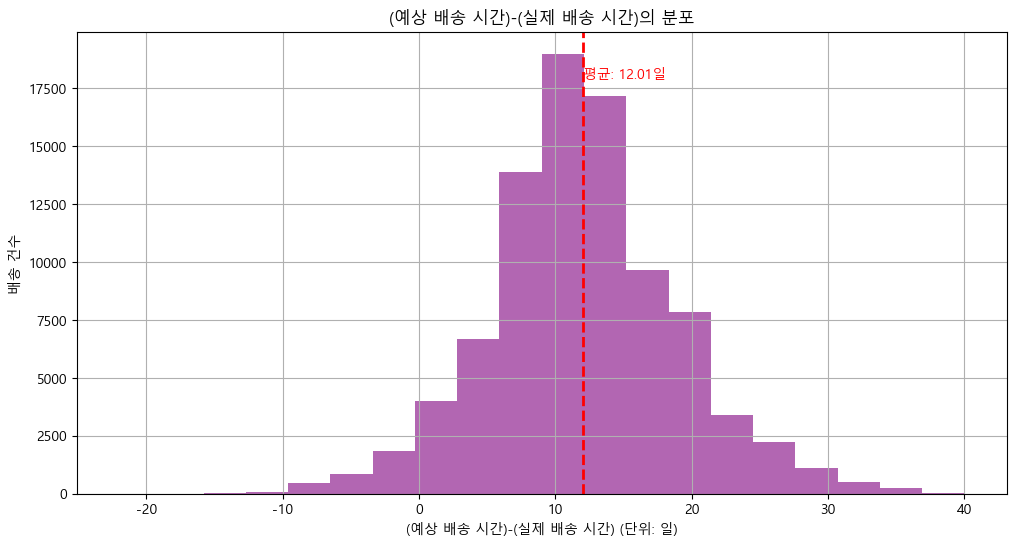

In [89]:
import matplotlib.pyplot as plt

ord_df['dd'].hist(bins=20, color='purple', alpha=0.6)  # 보라색 + 반투명
plt.title('(예상 배송 시간)-(실제 배송 시간)의 분포')
plt.xlabel('(예상 배송 시간)-(실제 배송 시간) (단위: 일)')
plt.ylabel('배송 건수')

mean_diff = ord_df['dd'].mean()
plt.axvline(mean_diff, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_diff, plt.ylim()[1]*0.9, f'평균: {mean_diff:.2f}일', color='red')

plt.show()



#### 리뷰 데이터 처리

In [60]:
rev_df = pd.read_csv("olist_order_reviews_dataset.csv")

In [61]:
rev_df['new_score'] = rev_df['review_score'].map({1:0, 2:0, 3:0, 4:1, 5:1})

rev_df_c = rev_df[['order_id', 'new_score', 'review_score']]

In [62]:
rev_df_c = rev_df[['order_id', 'new_score', 'review_score']]
rev_df_c = rev_df_c.drop_duplicates()

In [63]:
rev_df_c

,order_id,new_score,review_score
0,73fc7af87114b39712e6da79b0a377eb,1,4
1,a548910a1c6147796b98fdf73dbeba33,1,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,5
3,658677c97b385a9be170737859d3511b,1,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,5
...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,5
99220,22ec9f0669f784db00fa86d035cf8602,1,5
99221,55d4004744368f5571d1f590031933e4,1,5
99222,7725825d039fc1f0ceb7635e3f7d9206,1,4


#### 상품 데이터 처리

In [64]:
oi_df = pd.read_csv("olist_order_items_dataset.csv")

In [65]:
oi_df = handle_outliers_iqr_selection(oi_df, ["freight_value"])

In [66]:
fv_df = oi_df.groupby("order_id")["freight_value"].sum().reset_index()

#### 데이터 결합

In [67]:
df = pd.merge(rev_df_c, ord_df, how='inner', on='order_id')
df = pd.merge(df, fv_df, how='inner', on='order_id')

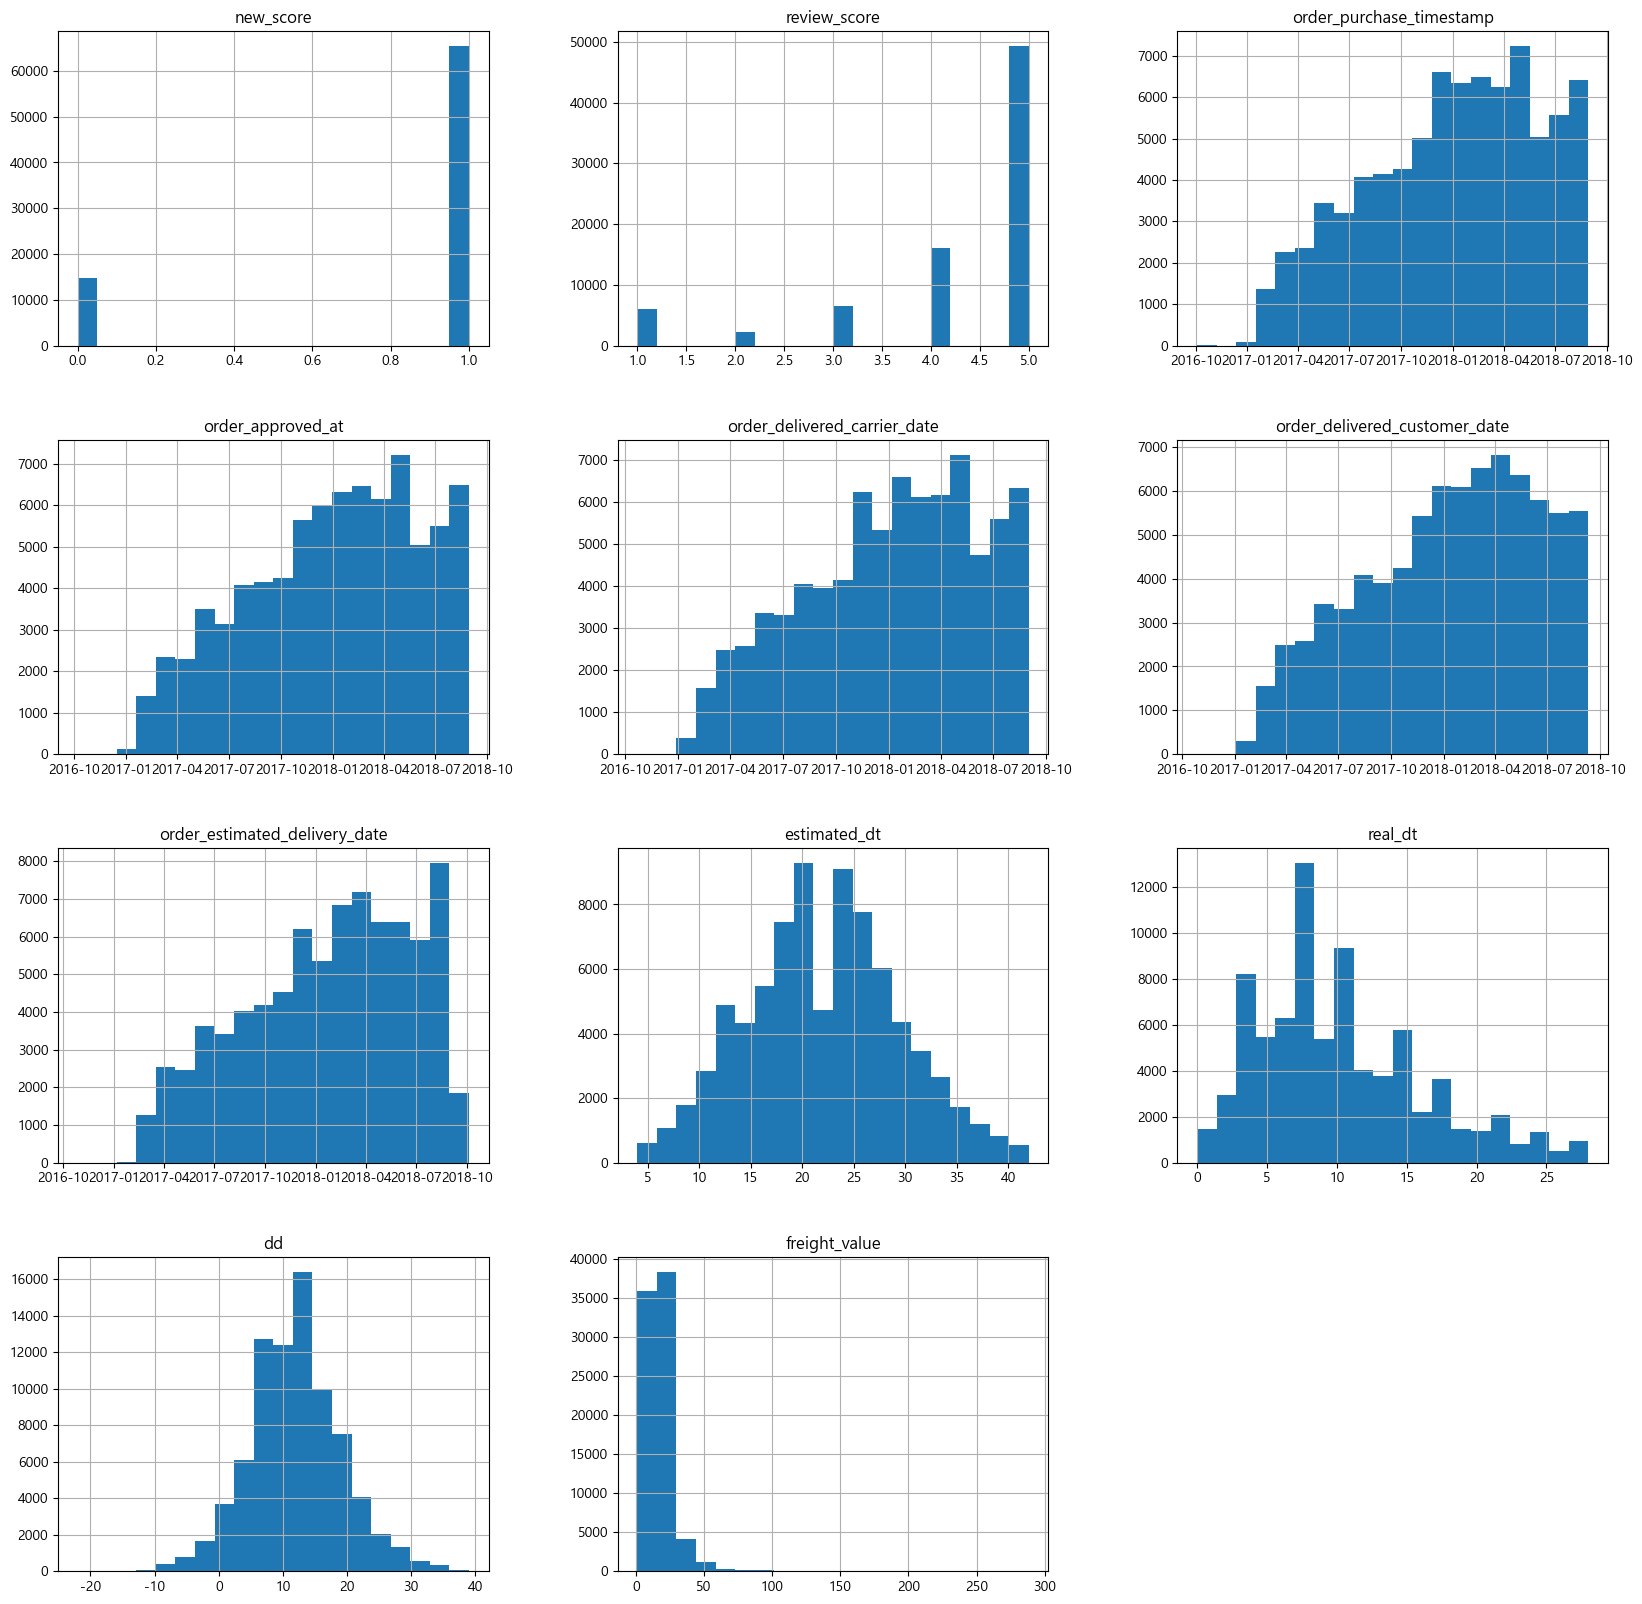

In [68]:
df.hist(bins=20, figsize=(20,20))
plt.show()

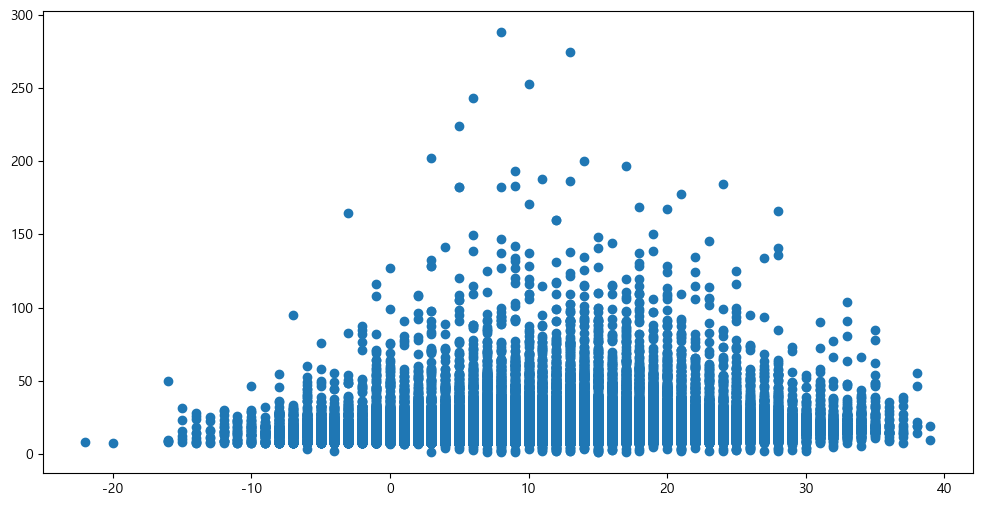

In [69]:
plt.scatter(df['dd'], df['freight_value'])

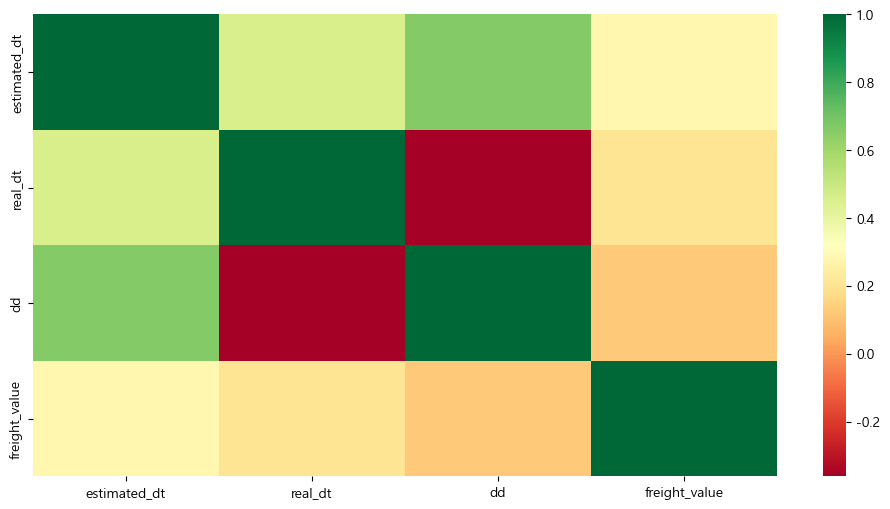

In [70]:
df_corr = df[[
    'estimated_dt', 'real_dt', 'dd', 'freight_value'
]]
corr_numeric = df_corr.corr()
sns.heatmap(corr_numeric, cmap='RdYlGn')
plt.show()

In [71]:
corr_numeric

,estimated_dt,real_dt,dd,freight_value
estimated_dt,1.000000,0.456971,0.664259,0.281234
real_dt,0.456971,1.000000,-0.361343,0.203736
dd,0.664259,-0.361343,1.000000,0.123598
freight_value,0.281234,0.203736,0.123598,1.000000


In [72]:
df_t = df[['new_score', 'dd']]

10.28851635672594
11.0


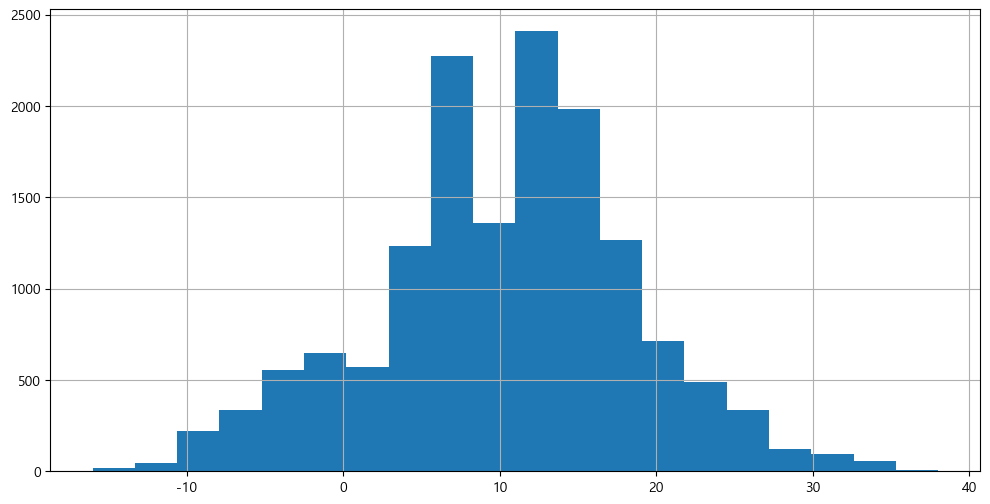

In [73]:
print(f"{df_t[df_t['new_score'] == 0]['dd'].mean()}")
print(f"{df_t[df_t['new_score'] == 0]['dd'].median()}")

df_t[df_t['new_score'] == 0]['dd'].hist(bins=20)
plt.show()

12.261666666666667
12.0


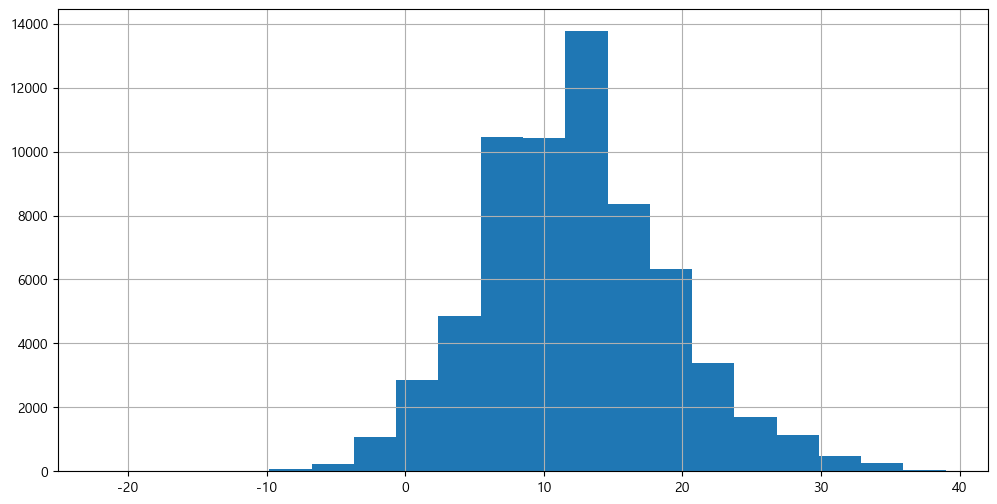

In [74]:
print(f"{df_t[df_t['new_score'] == 1]['dd'].mean()}")
print(f"{df_t[df_t['new_score'] == 1]['dd'].median()}")

df_t[df_t['new_score'] == 1]['dd'].hist(bins=20)
plt.show()

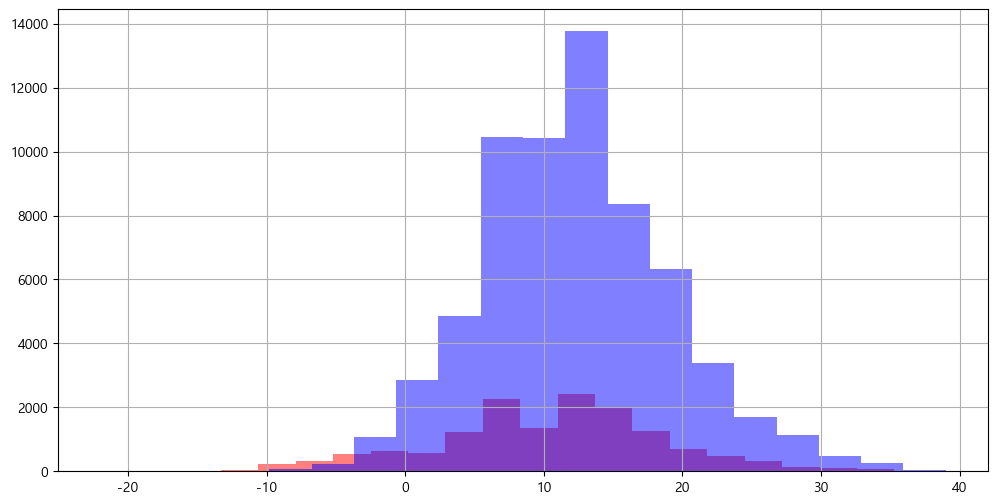

In [75]:
df_t[df_t['new_score'] == 0]['dd'].hist(bins=20, alpha=0.5, color='red')
df_t[df_t['new_score'] == 1]['dd'].hist(bins=20, alpha=0.5, color='blue')
plt.show()

#### T-Test

In [76]:
s_1 = df_t[df_t['new_score'] == 1]['dd']
s_0 = df_t[df_t['new_score'] == 0]['dd']

In [77]:
stat_0, p_0 = stats.shapiro(s_0)
stat_1, p_1 = stats.shapiro(s_1)
print(f"""
정규성 검정 결과
======================
부정적 리뷰의 예측과 실제 배송차이 정규성
검정통계량 : {stat_0:3f}
p-value: {p_0:3f}
======================
긍정적 리뷰의 예측과 실제 배송차이 정규성
검정통계량 : {stat_1:3f}
p-value: {p_1:3f}
======================

정규성을 만족하지 않는다.
""")


정규성 검정 결과
부정적 리뷰의 예측과 실제 배송차이 정규성
검정통계량 : 0.993563
p-value: 0.000000
긍정적 리뷰의 예측과 실제 배송차이 정규성
검정통계량 : 0.991041
p-value: 0.000000

정규성을 만족하지 않는다.



In [78]:
stat, p = stats.levene(s_0, s_1)
print(f"""
등분산 검정 결과
======================
검정통계량 : {stat:3f}
p-value: {p:3f}
======================

등분선성을 만족하지 않는다.
""")


등분산 검정 결과
검정통계량 : 908.162978
p-value: 0.000000

등분선성을 만족하지 않는다.



In [79]:
tstat, pval = stats.ttest_ind(s_0, s_1, equal_var=False)
print(f"""
T 검정 결과
======================
T 검정통계량 : {tstat:.3f}
p-value : {pval:.3f}
======================
""")
if pval < 0.05:
    print("두 집단의 차이가 존재한다")
else:
    print("두 집단의 차이가 존재하지 않는다.")


T 검정 결과
T 검정통계량 : -27.183
p-value : 0.000

두 집단의 차이가 존재한다


In [80]:
stat, pval = stats.mannwhitneyu(s_0, s_1, alternative='two-sided')
print(f"""
Mann-Whitney U 검정 결과
======================
검정통계량 : {stat:.3f}
p-value : {pval:.3f}
======================
""")
if pval < 0.05:
    print("두 집단의 차이가 존재한다")
else:
    print("두 집단의 차이가 존재하지 않는다.")


Mann-Whitney U 검정 결과
검정통계량 : 420218940.000
p-value : 0.000

두 집단의 차이가 존재한다


#### 카이제곱

In [81]:
df_t['dd_g'] = 0
df_t.loc[df_t['dd'] > 0, 'dd_g'] = 1
df_crosstab = pd.crosstab(df_t['dd_g'], df_t['new_score'])

In [82]:
chi2, pval, dof, expected = stats.chi2_contingency(df_crosstab)
print("χ² (Country × High/Low):", chi2, "p:", pval, "dof:", dof)

χ² (Country × High/Low): 2051.633968537791 p: 0.0 dof: 1


- ord_df['dd'] = ord_df['estimated_dt'] - ord_df['real_dt']
- 0보다 크면 배송 미지연
- 0보다 작으면 배송 지연

In [83]:
df_1 = df[df['dd'] < 0]
df_2 = df[df['dd'] >= 0]

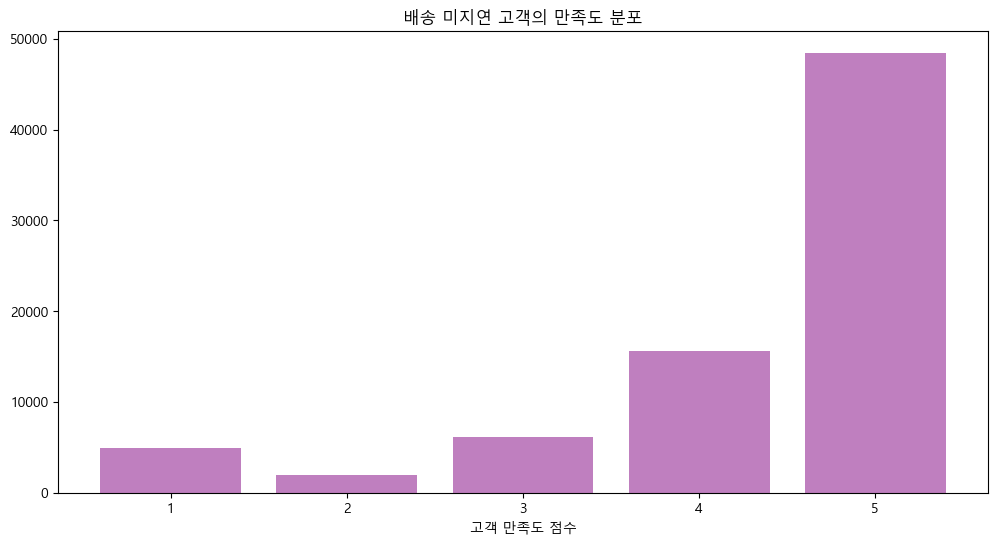

In [91]:
df_2_bar = df_2.groupby("review_score").size()
plt.bar(df_2_bar.index, df_2_bar.values, color='purple', alpha=0.5)
plt.title('배송 미지연 고객의 만족도 분포')
plt.xlabel('고객 만족도 점수')
plt.show()

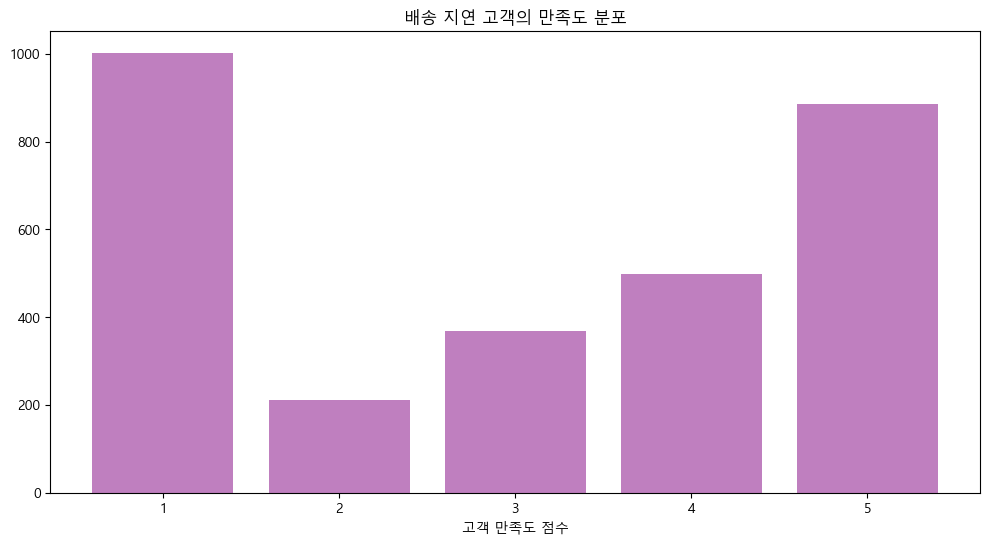

In [90]:
df_1_bar = df_1.groupby("review_score").size()
plt.bar(df_1_bar.index, df_1_bar.values, color='purple', alpha=0.5)
plt.title('배송 지연 고객의 만족도 분포')
plt.xlabel('고객 만족도 점수')
plt.show()